In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)

In [2]:
#Reading Data
df = pd.read_csv("dataset.csv")
print("Disease Set")
df.head()

Disease Set


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = pd.read_csv('Symptom-severity.csv')
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [4]:
# Checking for null values 
print("\nChecking the null")
print(df.isnull().sum())


Checking the null
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [5]:
print("Data Duplicate")
df.duplicated().sum()

Data Duplicate


4616

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
col = df.columns
data = df[col].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=col)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
#Storing the diseases and encoded symptoms in seperate dataframes
(df[col] == 0).all()
df['Disease'].value_counts()
df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [11]:
# Count of diseases
disease_count = df['Disease'].value_counts()
print("\nCOUNT OF DISEASES:")
print(disease_count)


COUNT OF DISEASES:
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                             

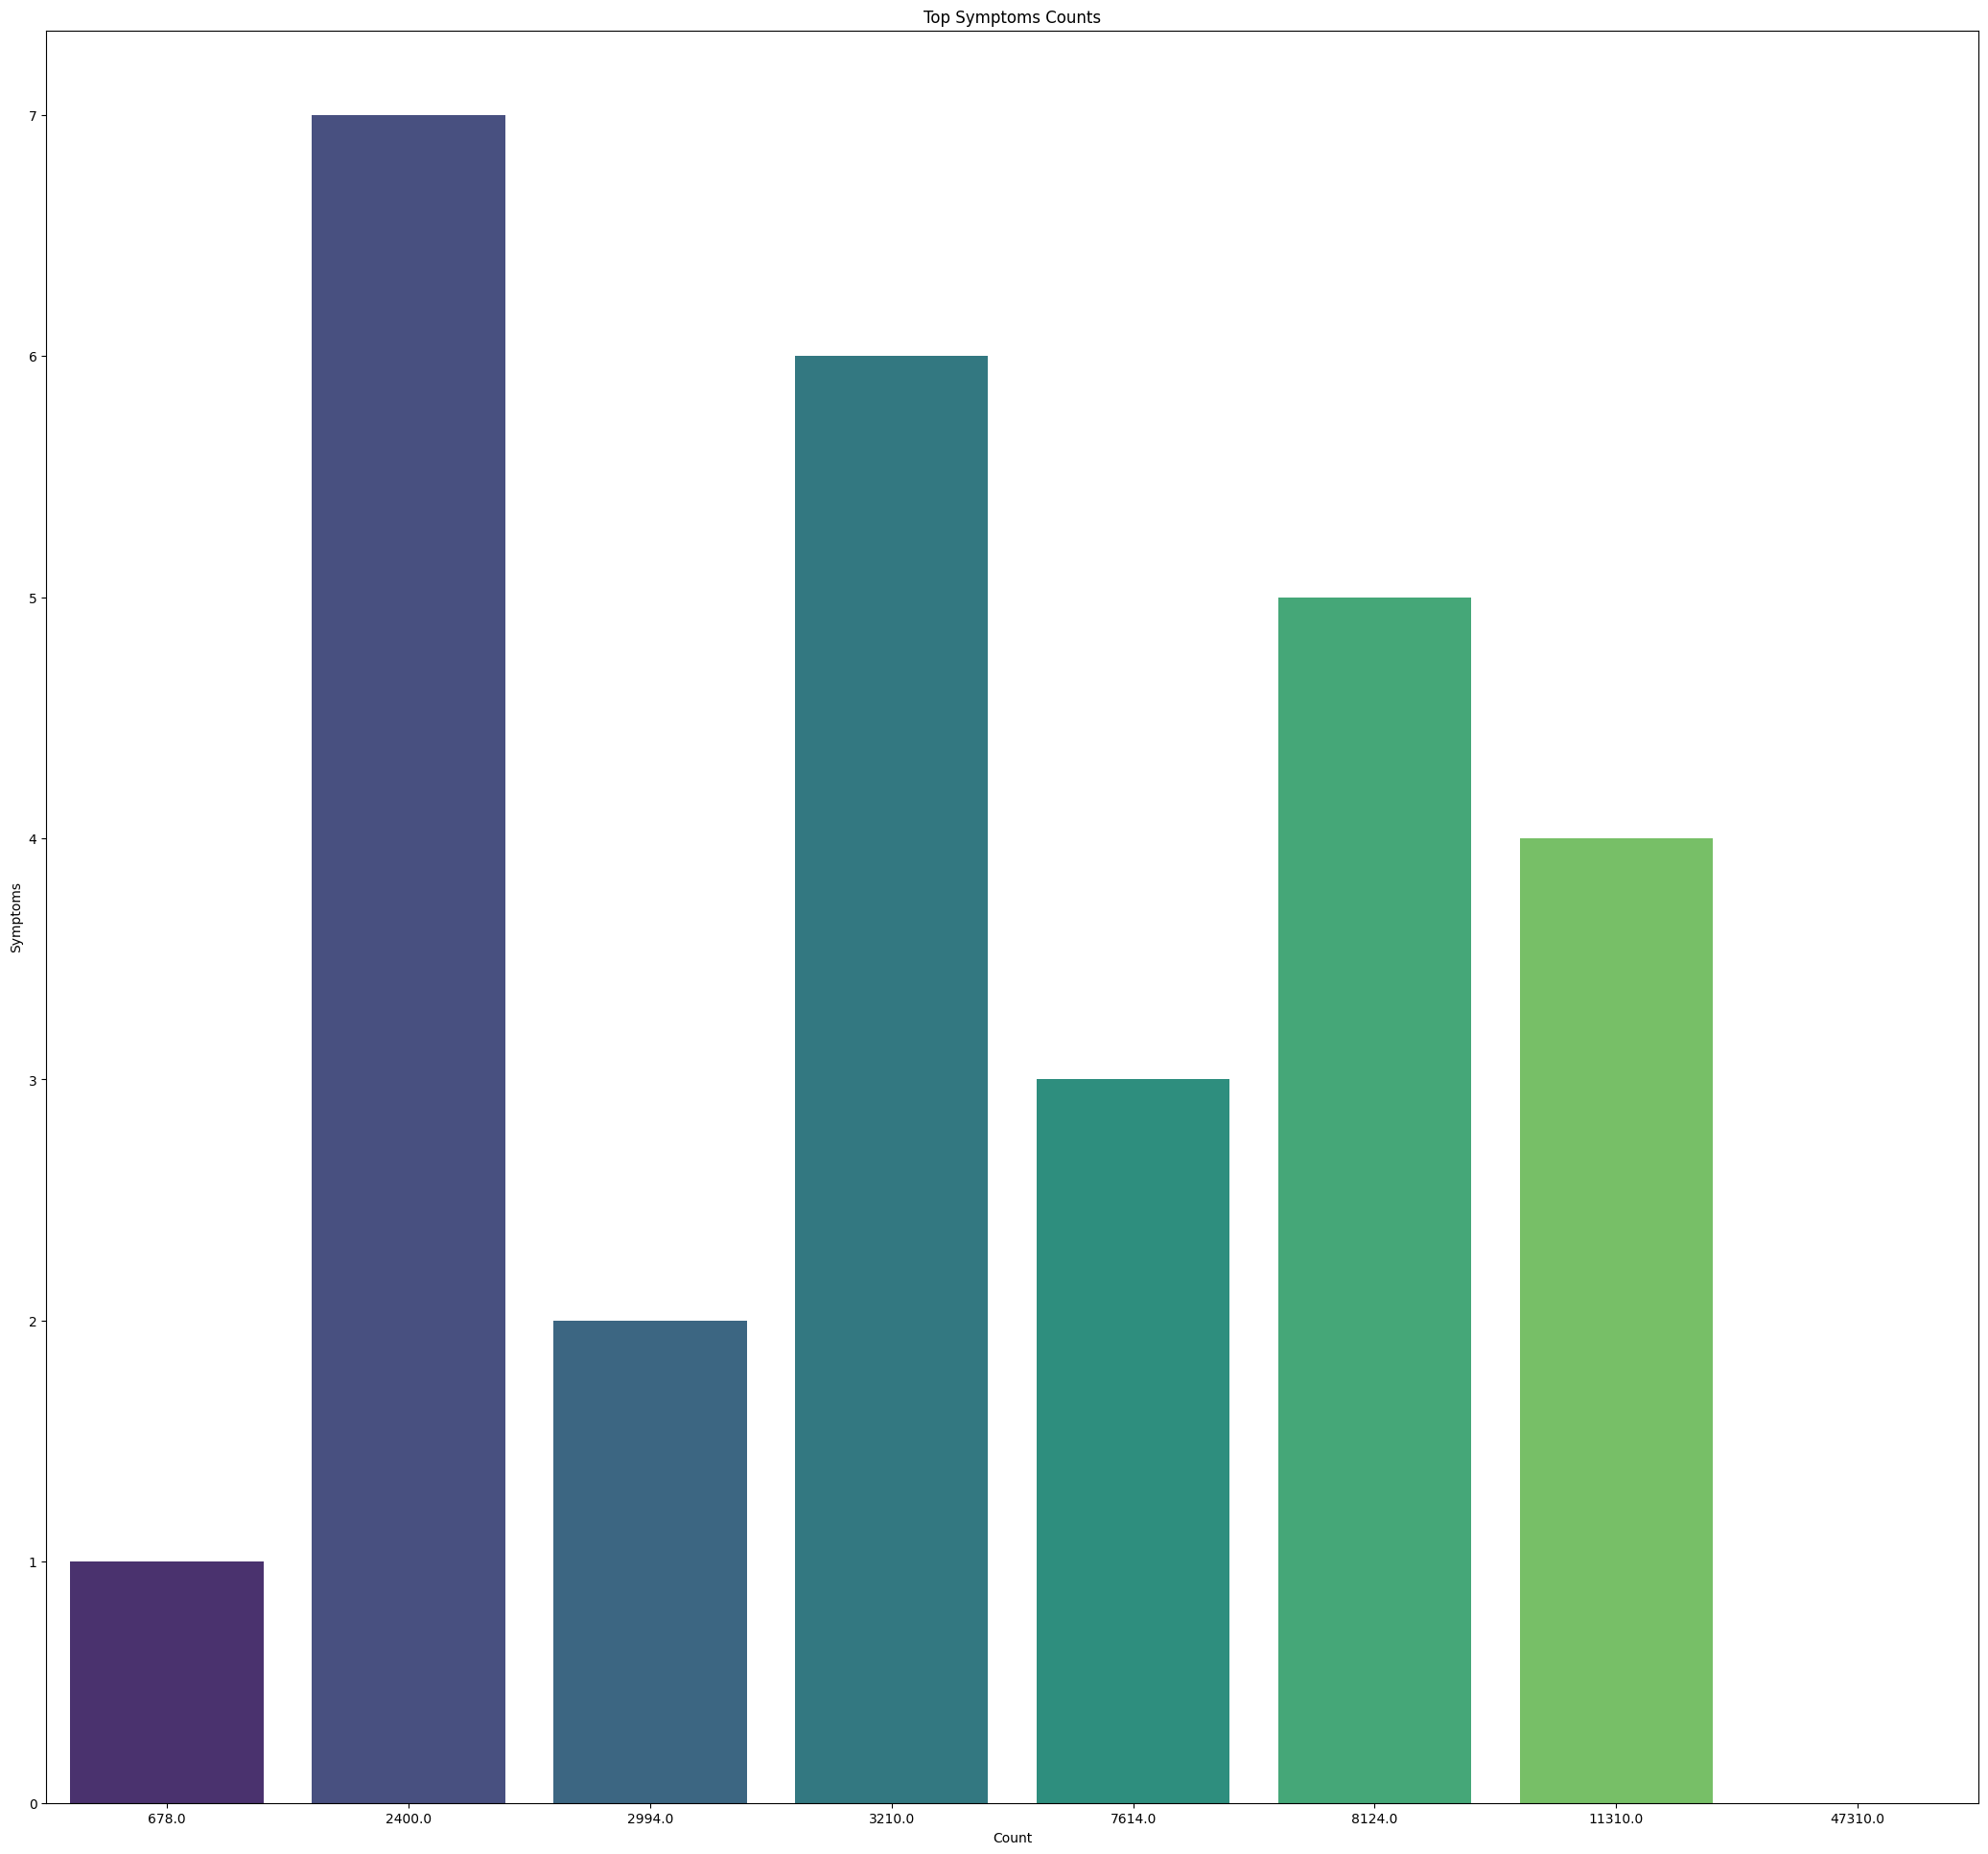

In [12]:
# Plotting symptom counts
symptoms = df.drop(columns=['Disease'])
symptom_counts = symptoms.apply(pd.value_counts).sum(axis=1)
symptom_counts = symptom_counts.sort_values(ascending=False)

plt.figure(figsize=(26,24))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.title('Top Symptoms Counts')
plt.show()

In [13]:
# Check the data types of the symptoms DataFrame
print(symptoms.dtypes)
# Check for missing values
print(symptoms.isnull().sum())

Symptom_1     int64
Symptom_2     int64
Symptom_3     int64
Symptom_4     int64
Symptom_5     int64
Symptom_6     int64
Symptom_7     int64
Symptom_8     int64
Symptom_9     int64
Symptom_10    int64
Symptom_11    int64
Symptom_12    int64
Symptom_13    int64
Symptom_14    int64
Symptom_15    int64
Symptom_16    int64
Symptom_17    int64
dtype: object
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64


In [14]:
df.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.147561,4.043902,3.828049,3.114634,2.654878,2.059756,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,1.316310,1.232387,1.390184,1.921436,2.169638,2.384472,2.340259,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


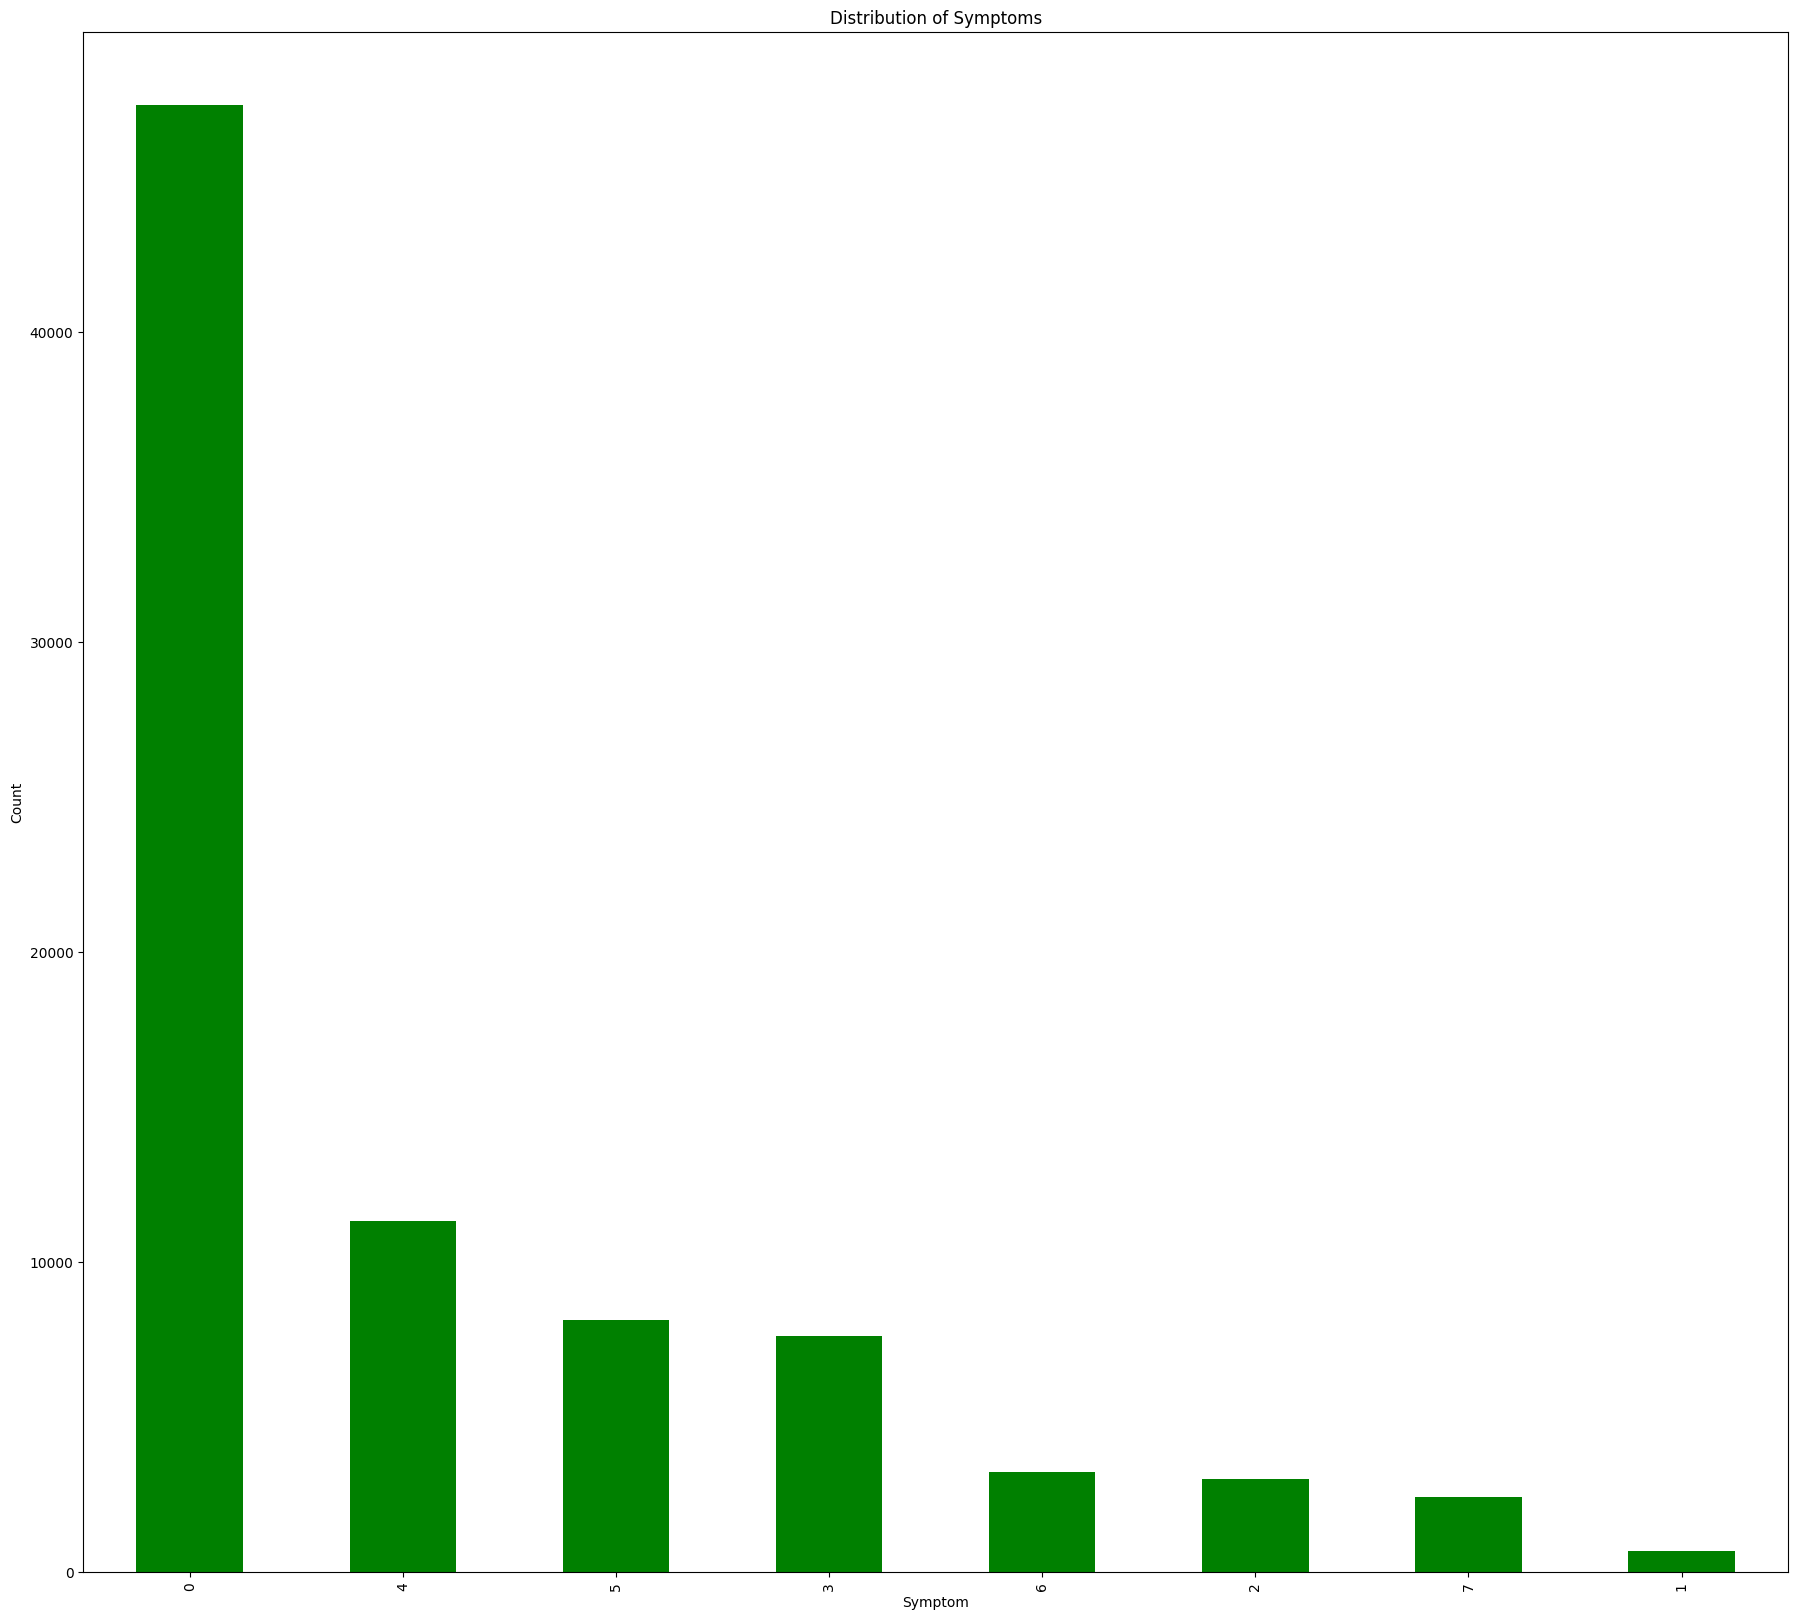

In [15]:
#To Visualize the distribution of symptoms across the dataset
plt.figure(figsize=(22, 20))
symptoms_stack = symptoms.stack().value_counts()
symptoms_stack.plot(kind='bar', color='green')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.title('Distribution of Symptoms')
plt.show()

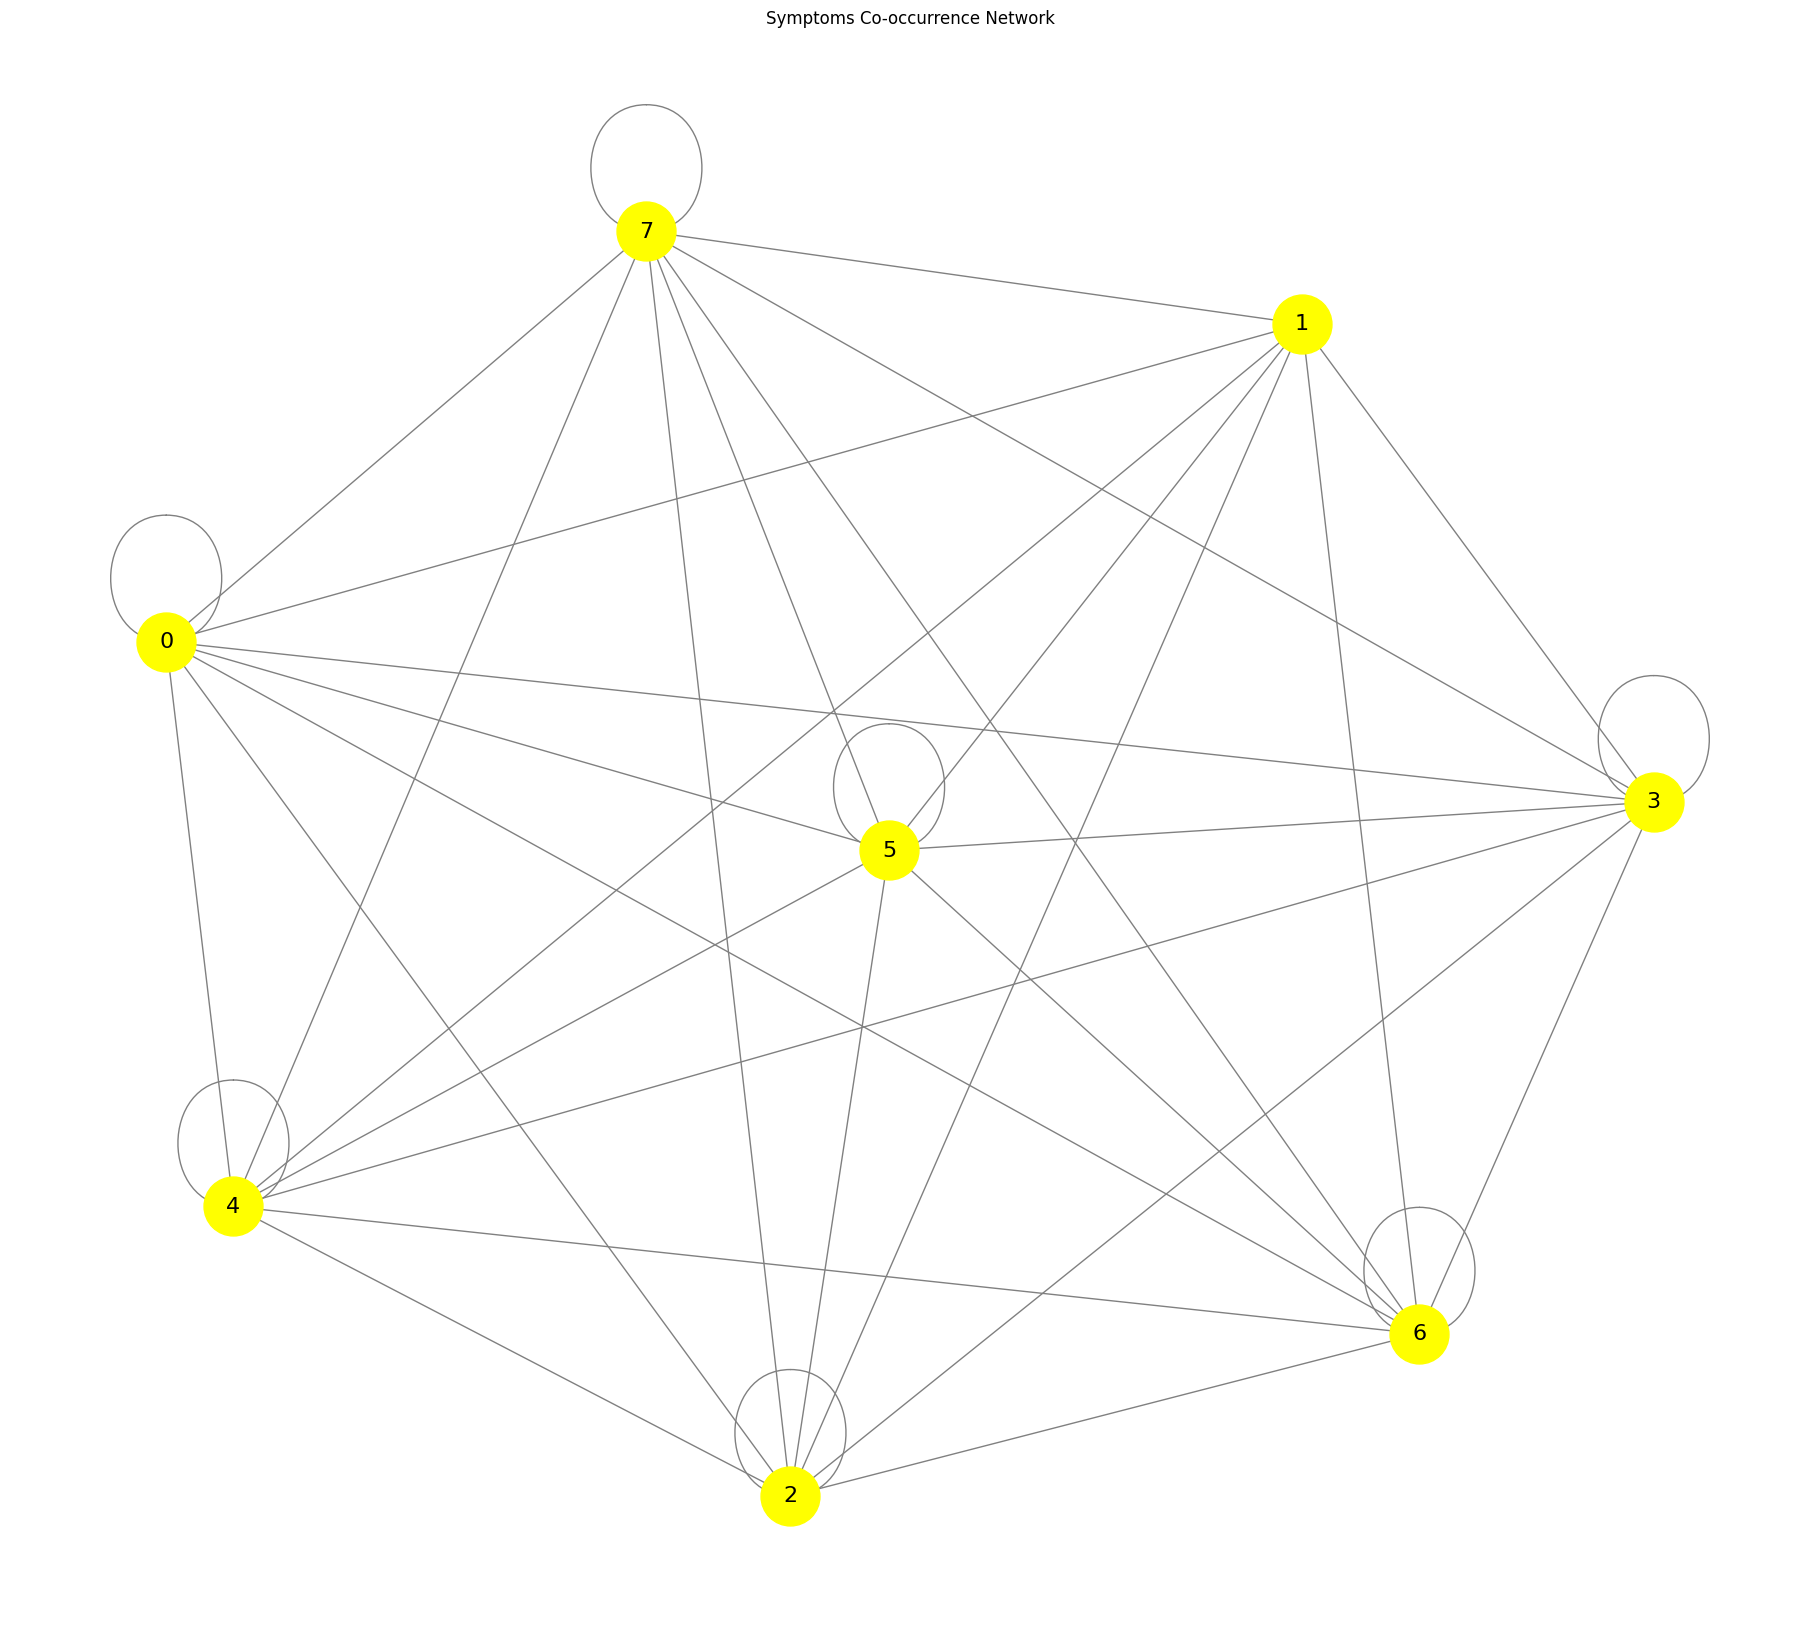

In [18]:
#identify groups of symptoms that tend to appear together.
import networkx as nx

G = nx.Graph()

# Add edges between symptoms that co-occur
for _, row in symptoms.iterrows():
    symptoms_list = row.dropna().tolist()
    for i in range(len(symptoms_list)):
        for j in range(i+1, len(symptoms_list)):
            G.add_edge(symptoms_list[i], symptoms_list[j])

# Plot the network
plt.figure(figsize=(18, 16))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='yellow', node_size=1800, edge_color='gray', linewidths=1,font_size=16)
plt.title('Symptoms Co-occurrence Network')
plt.show()

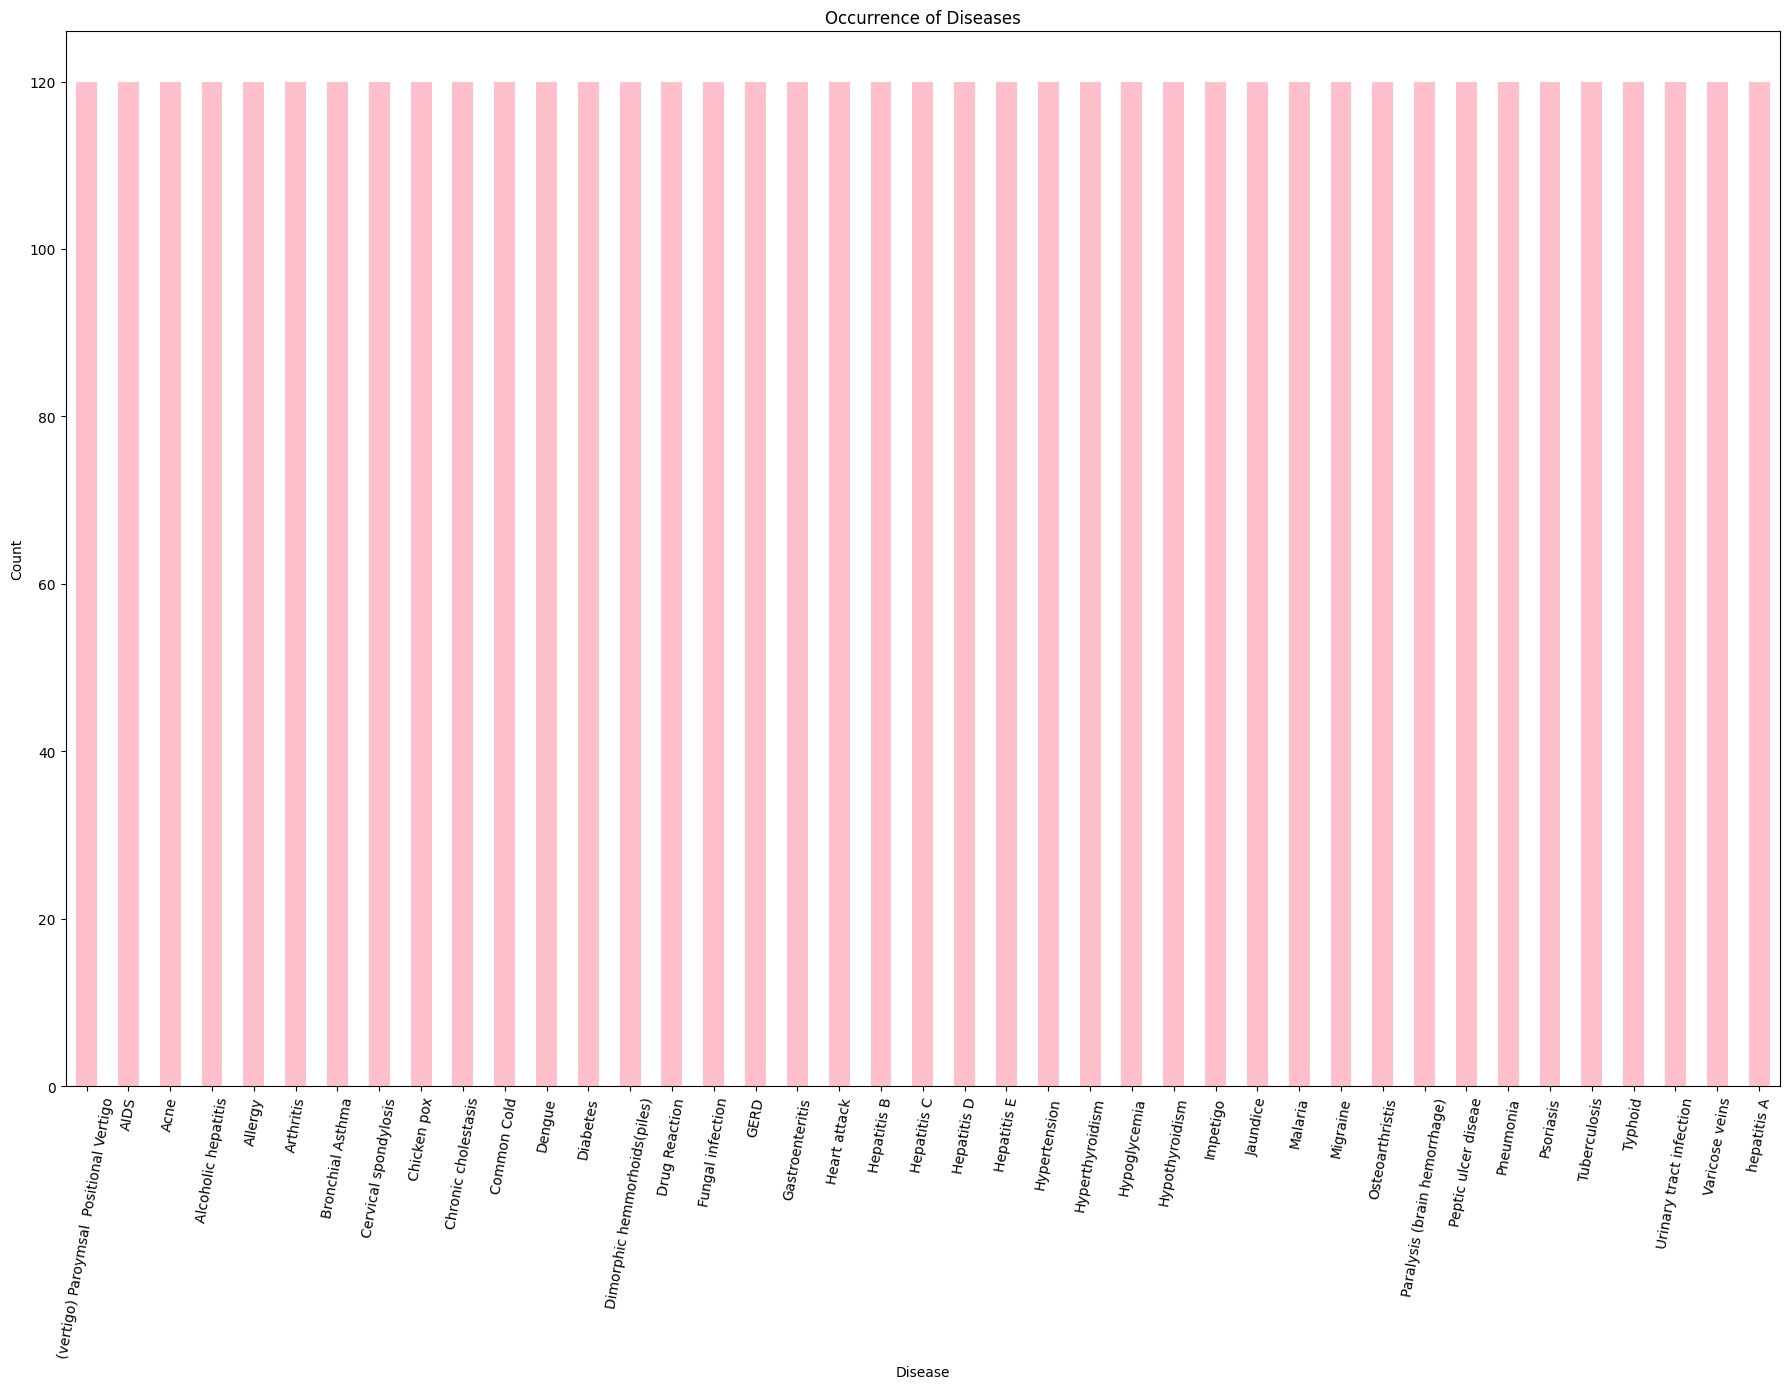

In [20]:
#visualizes the occurrence of diseases
disease_counts = df.groupby('Disease').size()

# Plotting the bar graph
plt.figure(figsize=(18, 14))
disease_counts.plot(kind='bar', color='pink')
plt.title('Occurrence of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def calculate_evaluation_metrics(y_true, y_pred):
    """This function is for calculating our evaluation metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    #auc_roc = roc_auc_score(y_true, y_pred,multi_class='ovo')
    
    return accuracy, precision, recall, f1

In [22]:
def print_evaluation_metrics(accuracy, precision, recall, f1):
    """This function is for printing the values of all our evaluation metrics"""
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1 Score:', f1)
    #print('Test AUC ROC:', auc_roc)

In [30]:
def evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1):
    
    """This function is for putting all the evaluation metrics on a chart after training each model"""
    #Evaluation metrics and their corresponding values
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    values = [test_precision,test_accuracy,test_f1, test_recall]

    # Create a vertical bar chart
    plt.figure(figsize=(8,6))
    plt.bar(metrics, values, color='magenta')
    plt.ylabel('Values')
    plt.xlabel('Evaluation Metrics')
    plt.title('Model Evaluation Metrics')

    # Display the values on top of the bars
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=14) 

    plt.tight_layout()
    plt.show()

In [24]:
def show_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy : {acc*100:.4f} %\n")
    print("Classification report: \n")
    print(report)

In [26]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)
    
    y_pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    
    sns.heatmap(df_cm, annot=True)

In [27]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 17) (738, 17) (4182,) (738,)


In [28]:
# Logistic Regression Classifier

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

Logistic Regression Classifier:
Accuracy on test set: 92.14%


/home/jovyan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.9214092140921409
Test Precision: 0.9227874191260508
Test Recall: 0.9227974714401095
Test F1 Score: 0.9200829092295122


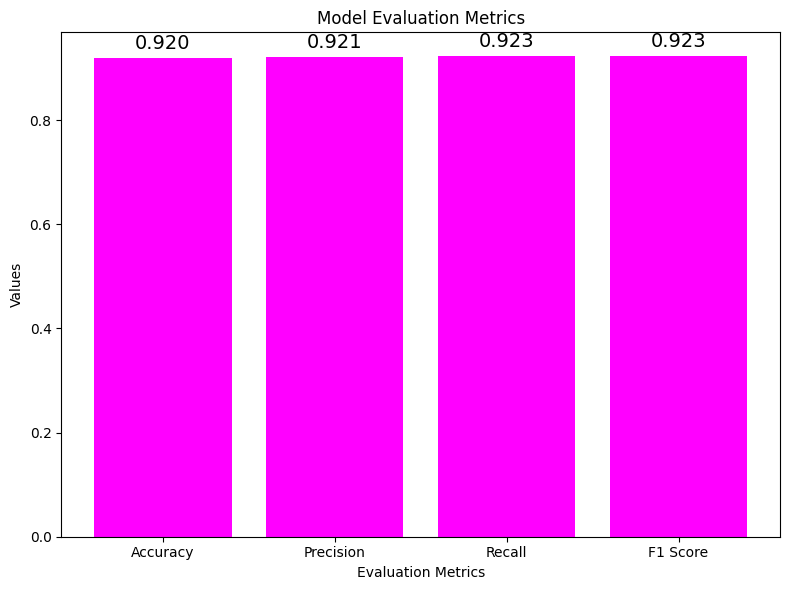

In [31]:
test_accuracy, test_precision, test_recall, test_f1 = calculate_evaluation_metrics(y_test, logreg_pred)

print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

evaluation_metrics(test_accuracy, test_f1, test_precision, test_recall)

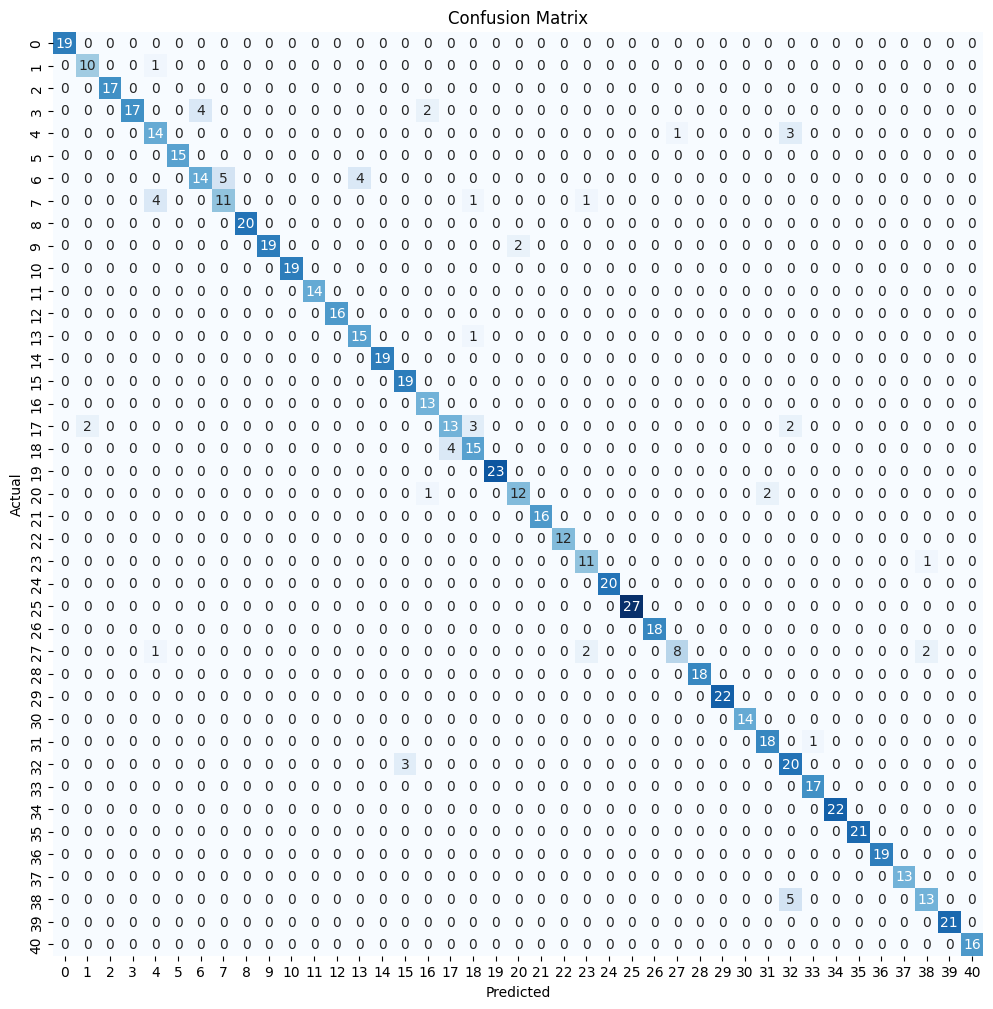

In [32]:
show_confusion_matrix(y_test, logreg_pred)

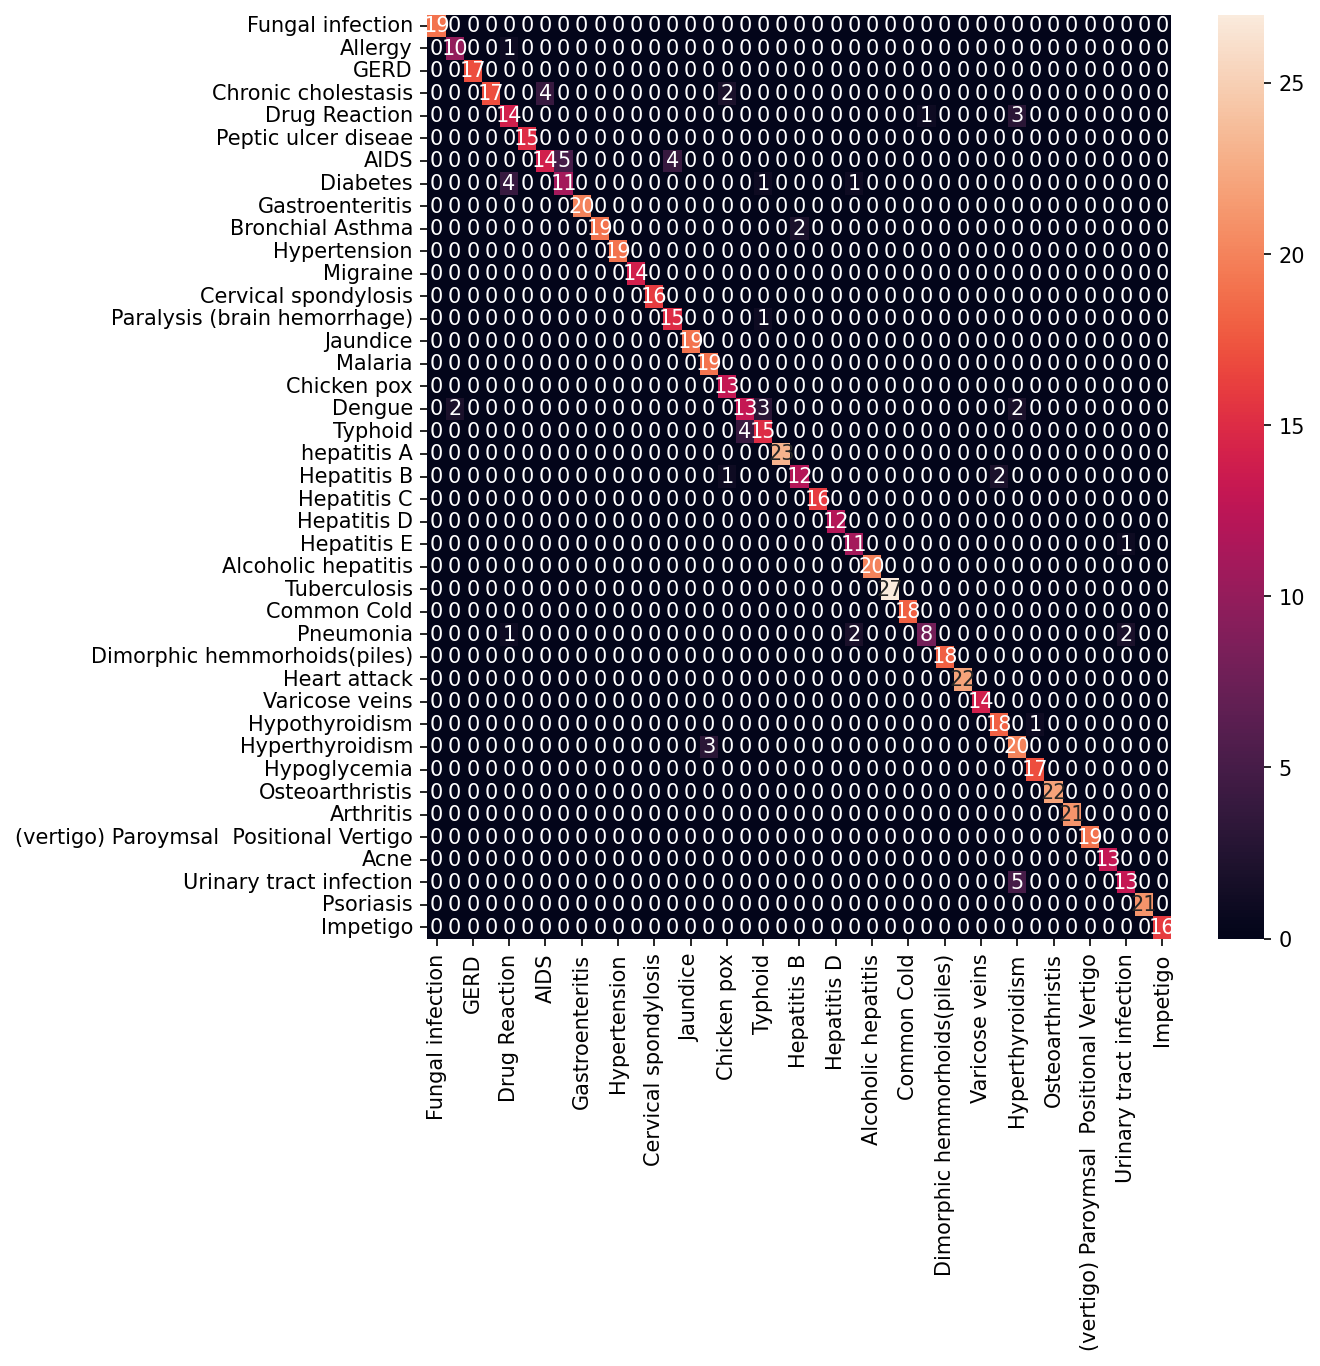

In [33]:
confusion_plot(logreg, x_test, y_test)

In [37]:
#Decision Tree Classifier
from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_test_pred = dt_model.predict(x_test)

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1 = calculate_evaluation_metrics(y_test, y_test_pred)
#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

Test Accuracy: 0.991869918699187
Test Precision: 0.9914083206766132
Test Recall: 0.9907156646817304
Test F1 Score: 0.9906419112195748


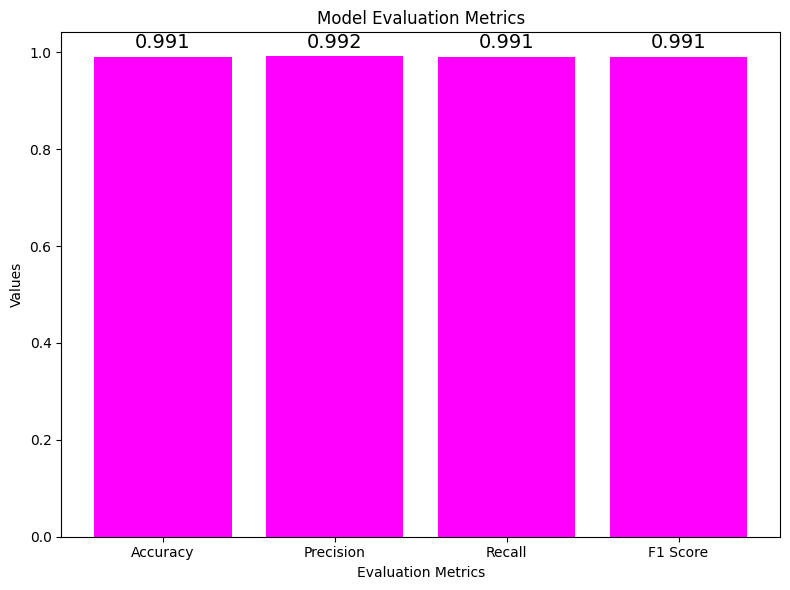

In [38]:
evaluation_metrics(test_accuracy, test_f1, test_precision, test_recall)

In [39]:
dt_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set: {:.2f}%".format(dt_acc * 100))

Accuracy on test set: 99.19%


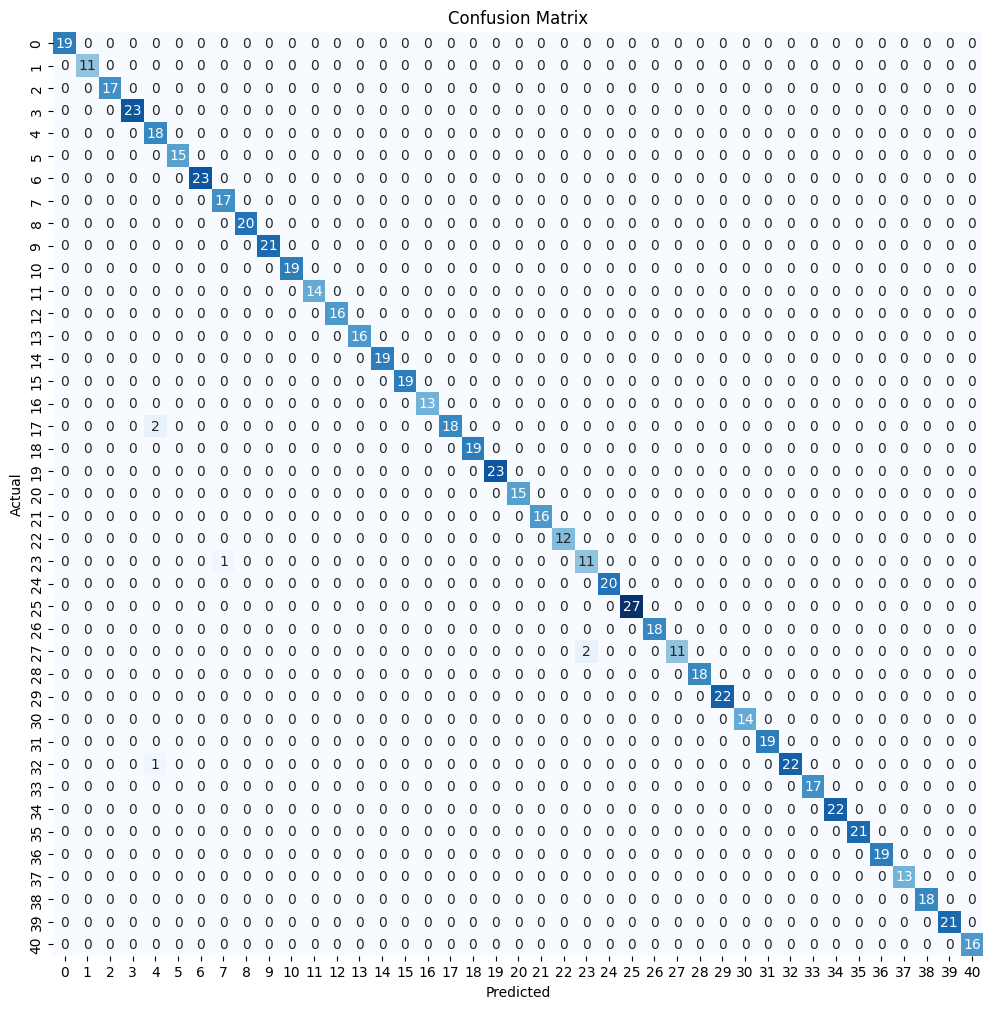

In [40]:
show_confusion_matrix(y_test, y_test_pred)

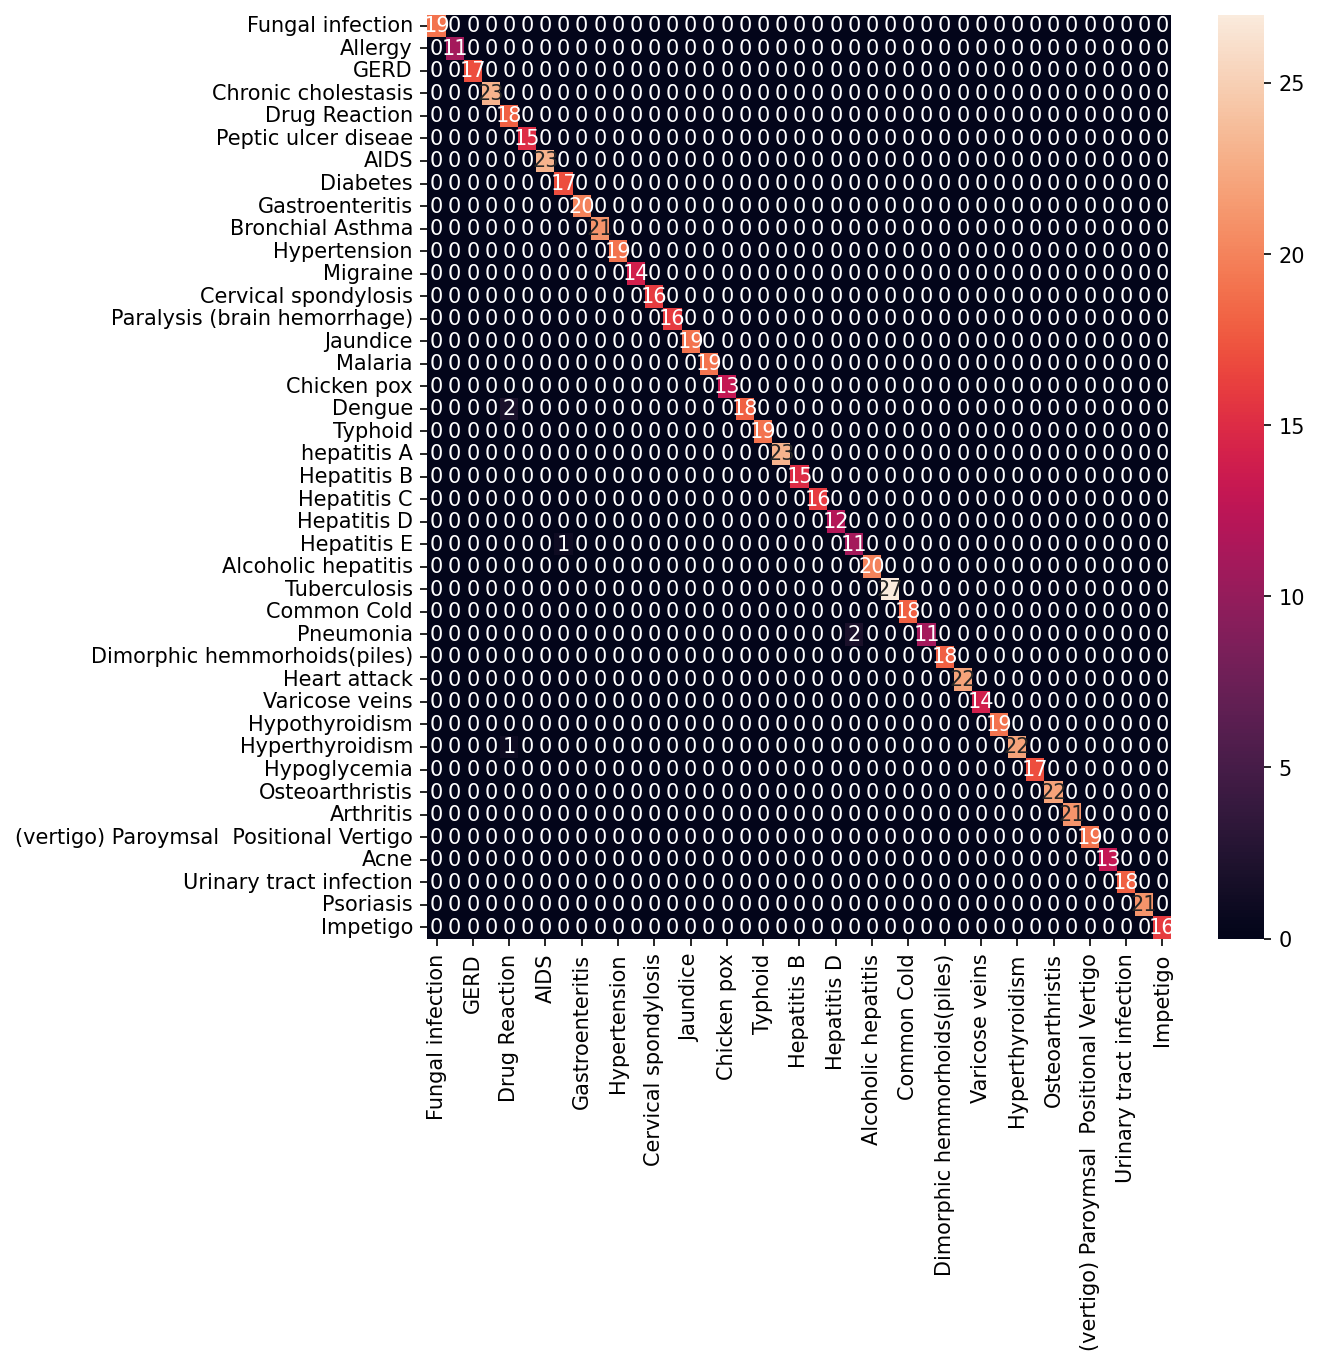

In [45]:
confusion_plot(dt_model, x_test, y_test)

In [41]:
#Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
rf_model.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)

rf_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set: {:.2f}%".format(rf_acc * 100))
print()
test_accuracy, test_precision, test_recall, test_f1 = calculate_evaluation_metrics(y_test, y_test_pred)

print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

Accuracy on test set: 99.19%

Test Accuracy: 0.991869918699187
Test Precision: 0.9914083206766132
Test Recall: 0.9907156646817304
Test F1 Score: 0.9906419112195748


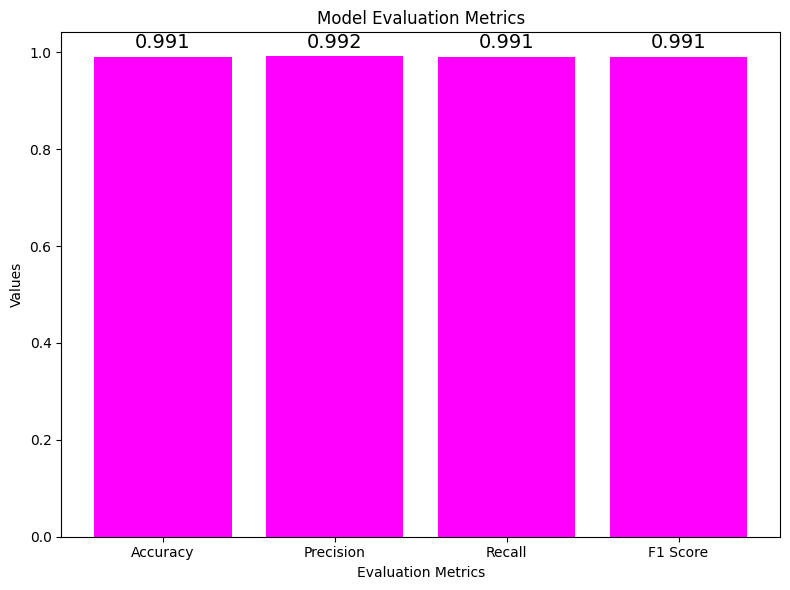

In [42]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

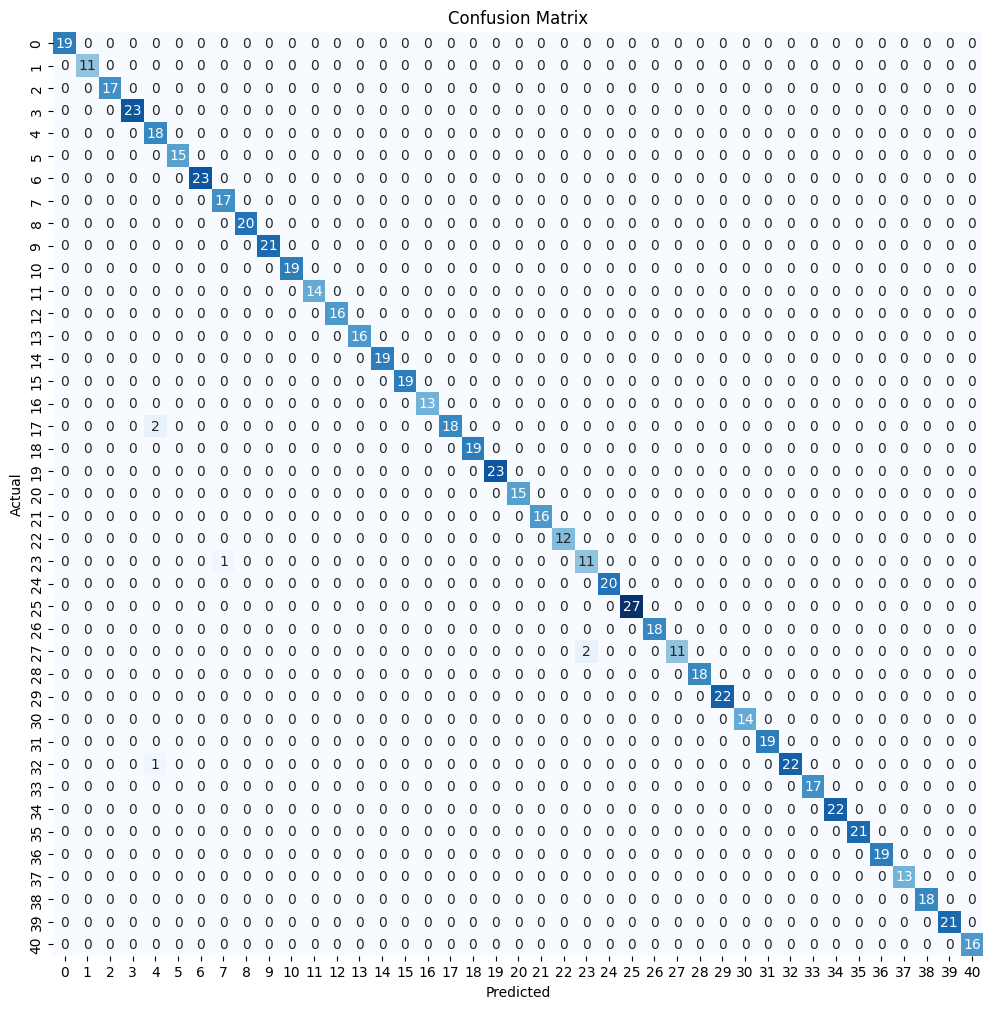

In [43]:
show_confusion_matrix(y_test, y_test_pred)

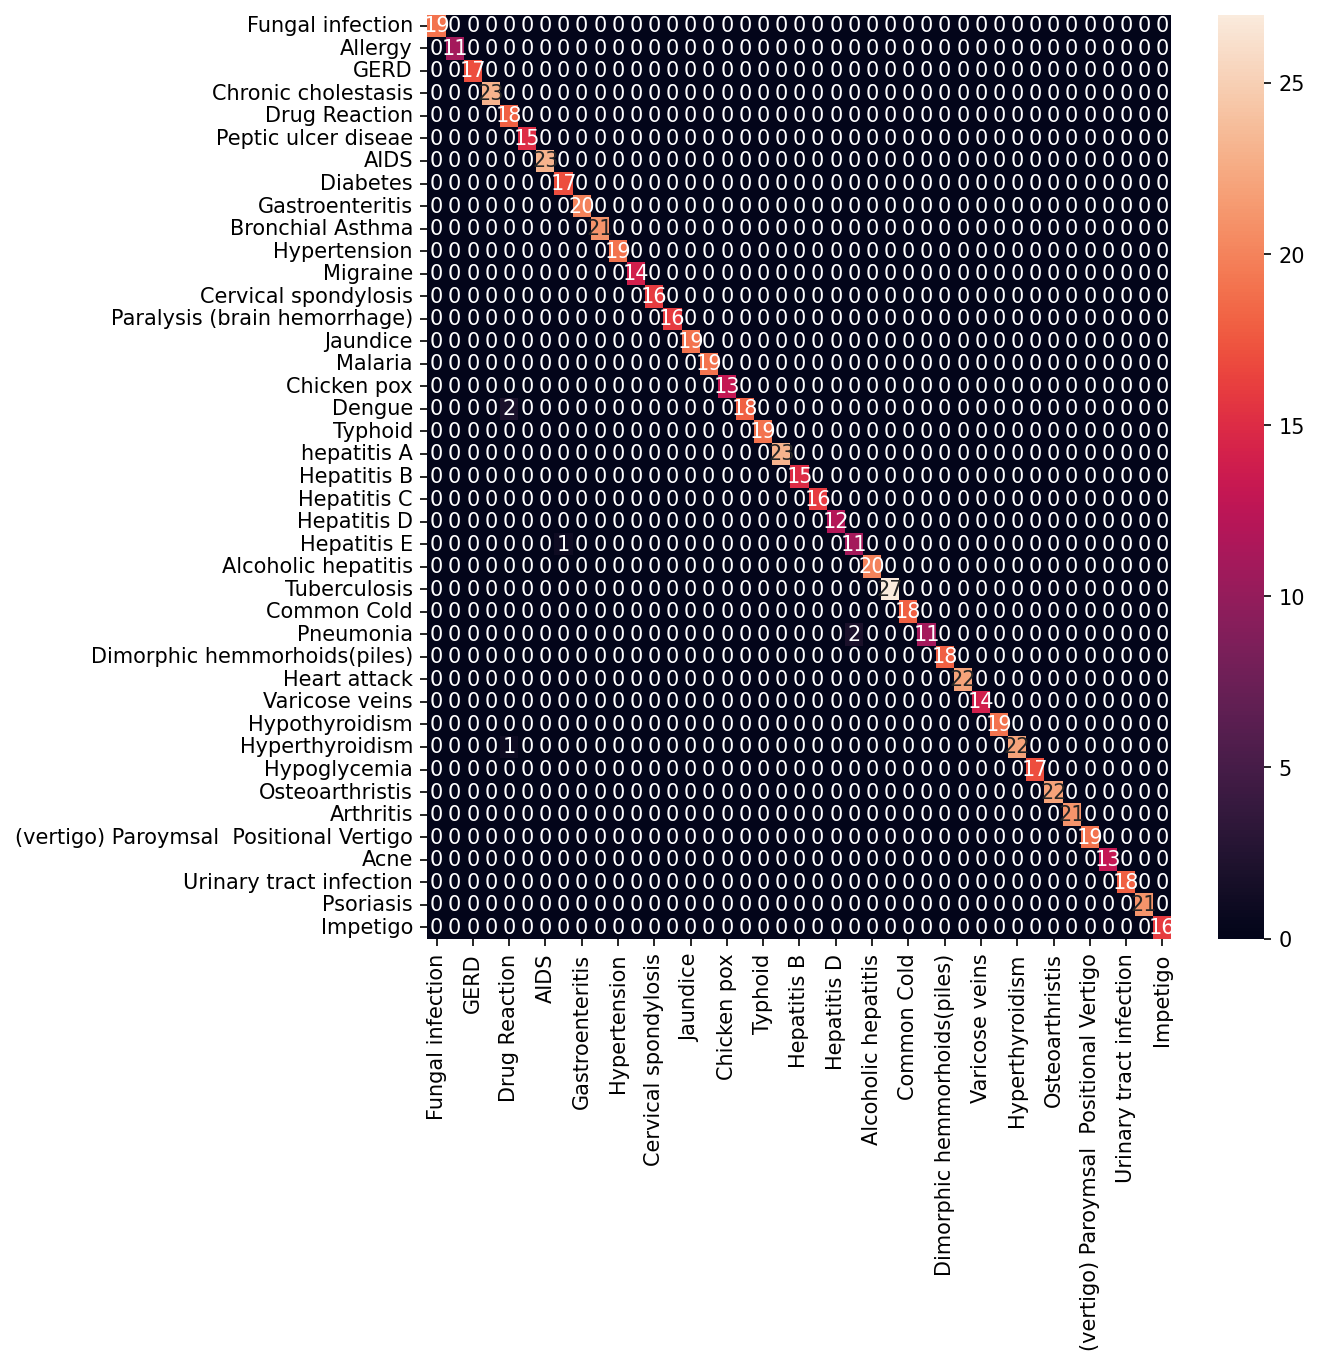

In [46]:
confusion_plot(rf_model, x_test, y_test)

In [47]:
create_report(rf_model, x_test, y_test)

Accuracy : 99.1870 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        19
                                   AIDS       1.00      1.00      1.00        11
                                   Acne       1.00      1.00      1.00        17
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       0.86      1.00      0.92        18
                              Arthritis       1.00      1.00      1.00        15
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       0.94      1.00      0.97        17
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

In [49]:
#K-Nearest Neighbors

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

test_accuracy, test_precision, test_recall, test_f1 = calculate_evaluation_metrics(y_test, knn_pred)
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

Test Accuracy: 0.991869918699187
Test Precision: 0.9916376306620209
Test Recall: 0.9913134647773784
Test F1 Score: 0.9908164791990209


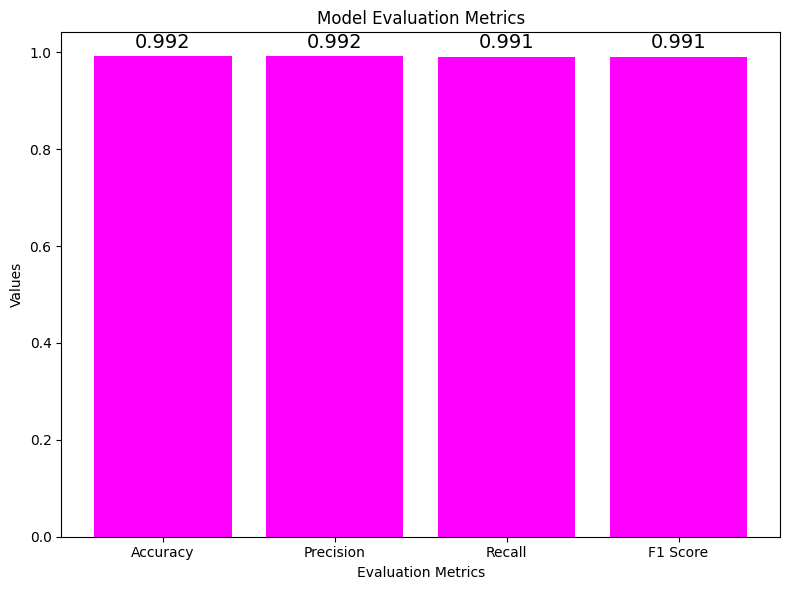

In [50]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

In [51]:
create_report(knn_model, x_test, y_test)

Accuracy : 99.1870 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        19
                                   AIDS       1.00      1.00      1.00        11
                                   Acne       1.00      1.00      1.00        17
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       0.86      1.00      0.92        18
                              Arthritis       1.00      1.00      1.00        15
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       1.00      0.94      0.97        17
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00 

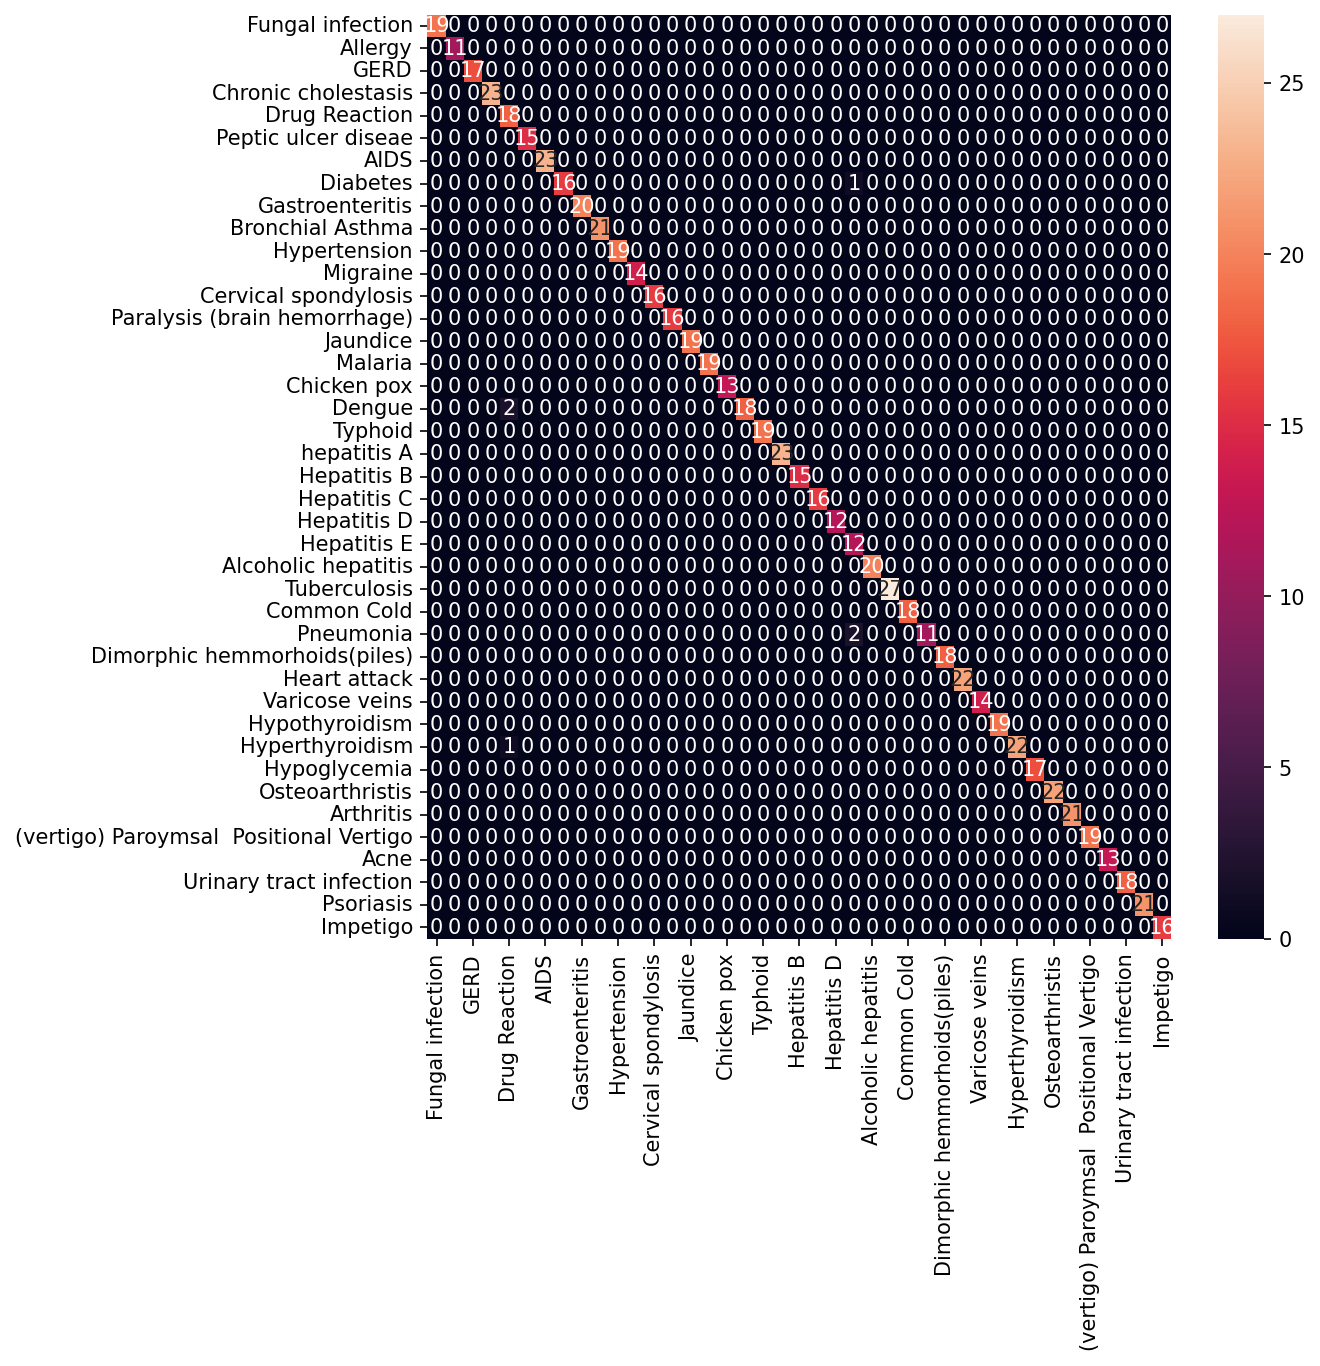

In [52]:
confusion_plot(knn_model, x_test, y_test)

In [54]:
#SVM
svc_model = SVC()
svc_model.fit(x_train, y_train)
svm_pred = svc_model.predict(x_test)

test_accuracy, test_precision, test_recall, test_f1 = calculate_evaluation_metrics(y_test, svm_pred)
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

Test Accuracy: 0.943089430894309
Test Precision: 0.9475482831335309
Test Recall: 0.9434393255186192
Test F1 Score: 0.9425595722539919


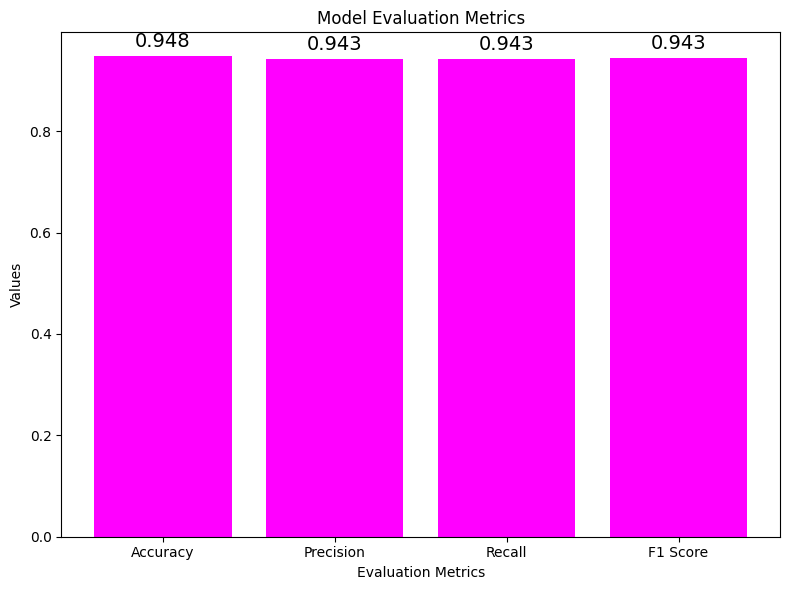

In [55]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1)

In [57]:
create_report(svc_model, x_test, y_test)

Accuracy : 94.3089 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.83      1.00      0.90        19
                                   AIDS       1.00      1.00      1.00        11
                                   Acne       1.00      1.00      1.00        17
                    Alcoholic hepatitis       1.00      0.87      0.93        23
                                Allergy       0.79      0.83      0.81        18
                              Arthritis       1.00      1.00      1.00        15
                       Bronchial Asthma       1.00      0.83      0.90        23
                   Cervical spondylosis       0.92      0.71      0.80        17
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       0.95      0.90      0.93        21
                            Common Cold       1.00      1.00 

In [58]:
print(svm_pred)

['Drug Reaction' 'Drug Reaction' 'Chronic cholestasis' 'Hepatitis D'
 '(vertigo) Paroymsal  Positional Vertigo' 'Migraine'
 'Alcoholic hepatitis' 'Allergy' 'Osteoarthristis' 'Drug Reaction'
 'Migraine' 'Hypoglycemia' 'Cervical spondylosis' 'Tuberculosis'
 'Hepatitis B' 'Impetigo' 'Drug Reaction' 'Chronic cholestasis' 'Migraine'
 'Migraine' 'Hypertension' 'Peptic ulcer diseae' 'Jaundice' 'Hepatitis B'
 'Drug Reaction' 'Hepatitis D' 'Hepatitis C' 'Acne' 'hepatitis A'
 '(vertigo) Paroymsal  Positional Vertigo' 'Jaundice'
 '(vertigo) Paroymsal  Positional Vertigo' 'Chronic cholestasis'
 '(vertigo) Paroymsal  Positional Vertigo' 'Psoriasis' 'Hepatitis B'
 'Migraine' 'Psoriasis' 'GERD' 'Hypoglycemia'
 'Dimorphic hemmorhoids(piles)' 'Dengue' 'Hepatitis E' 'Fungal infection'
 'hepatitis A' 'Allergy' 'Hepatitis D' 'Hepatitis B' 'AIDS' 'Arthritis'
 'Malaria' 'Cervical spondylosis' 'Diabetes' 'Acne' 'Chronic cholestasis'
 'Hypoglycemia' 'AIDS' 'Alcoholic hepatitis' 'Acne' 'Hepatitis E'
 'Osteoart

In [62]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Disease', axis=1)  # Features
y = df['Disease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
	("mapper", DataFrameMapper([
                           (['Symptom_1'],[LabelEncoder()])
                          ,(['Symptom_2'],[LabelEncoder()])
                          ,(['Symptom_3'],[LabelEncoder()])
                          ,(['Symptom_4'],[LabelEncoder()])
                          ,(['Symptom_5'],[LabelEncoder()])
                          ,(['Symptom_6'],[LabelEncoder()])
                          ,(['Symptom_7'],[LabelEncoder()])
                          ,(['Symptom_8'],[LabelEncoder()])
                          ,(['Symptom_9'],[LabelEncoder()])
                          ,(['Symptom_10'],[LabelEncoder()])
                          ,(['Symptom_11'],[LabelEncoder()])
                          ,(['Symptom_12'],[LabelEncoder()])
                          ,(['Symptom_13'],[LabelEncoder()])
                          ,(['Symptom_14'],[LabelEncoder()])
                          ,(['Symptom_15'],[LabelEncoder()])
                          ,(['Symptom_16'],[LabelEncoder()])
                          ,(['Symptom_17'],[LabelEncoder()])

                         ], input_df=True, df_out=True)),
	                      ("Scalar",StandardScaler()),
                  ("classifier", LogisticRegression(multi_class='auto', solver='lbfgs'))
])

#  Train the model
pipeline.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#  Print performance metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:\n', classification_rep)

/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Accuracy: 90.99%
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.76      0.88      0.81        32
                                   AIDS       0.93      0.95      0.94        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      0.86      0.93        36
                                Allergy       0.79      0.86      0.82        35
                              Arthritis       0.93      0.72      0.81        36
                       Bronchial Asthma       0.89      0.70      0.78        44
                   Cervical spondylosis       0.62      0.62      0.62        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       0.82      0.93      0.87        30
                            Common Cold       1.00      1.00      1

/home/jovyan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [63]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        SVM()

def SVM():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])

    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

In [65]:
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

root = Tk()
root.title(" Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)
location = StringVar()
location.set(None)

w2 = Label(root, justify=CENTER, text=" Disease Prediction From Symptoms ")
w2.config(font=("Helvetica", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Helvetica", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Helvetica", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Helvetica", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Helvetica", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Helvetica", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Helvetica", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

locLb = Label(root,  text="Location")
locLb.config(font=("Helvetica", 15))
locLb.grid(row=12, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Helvetica", 15))
lr.grid(row=15, column=1,pady=10)

#OPTIONS = sorted(symptoms)
OPTIONS = ["fatigue", "yellowish_skin", "loss_of_appetite", "yellowing_of_eyes", 'family_history',"stomach_pain", "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]
LOCATIONS = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=1)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=1)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=1)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=1)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=1)

LocEn = OptionMenu(root, location,*LOCATIONS)
LocEn.grid(row=12, column=1)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Helvetica", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=20)
t3.config(font=("Helvetica", 20))
t3.grid(row=19, column=1 , padx=10)

root.mainloop()

ModuleNotFoundError: No module named 'tkinter'